In [55]:
!pip install pandas matplotlib numpy awswrangler

You should consider upgrading via the '/Users/lucasdu/Documents/AWS-MAC/Projetos/webinar-cnpq/demonstration/venv/bin/python -m pip install --upgrade pip' command.


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import awswrangler as wr

In [33]:
%matplotlib inline

In [50]:
# CHANGE FOR READING DATA FROM S3
data_path = "./caso.csv"
df_covid = pd.read_csv(data_path, sep=',')

In [82]:
# Get only the lastest cases of Covid from each State
df_recent_cases = df_covid.loc[df_covid['is_last'] == True]

df_datetime_cases = df_covid.loc[df_covid['is_last'] == False]
df_datetime_cases['date'] = pd.to_datetime(df_datetime_cases['date'], format='%Y-%m-%d')

<ipython-input-82-4cbcb09b12c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_datetime_cases['date'] = pd.to_datetime(df_datetime_cases['date'], format='%Y-%m-%d')


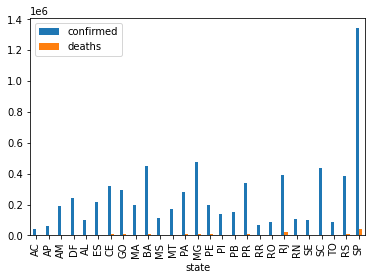

In [81]:
df_state_dataset_last = df_recent_cases.loc[df_recent_cases["place_type"] == "state"]

state_cases_death = df_state_dataset_last[['state', 'confirmed', 'deaths']]

state_cases_death.plot(kind='bar', x='state', y=['confirmed', 'deaths'])
plt.show()

<AxesSubplot:xlabel='date'>

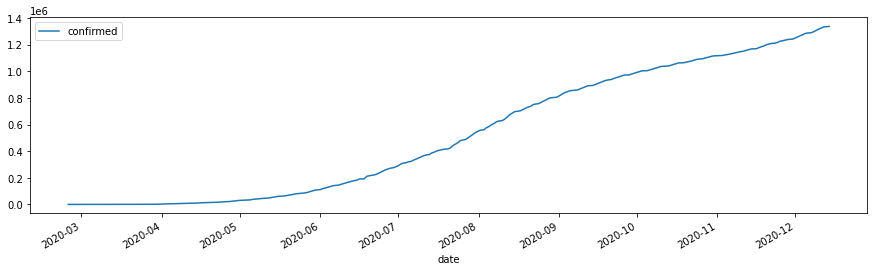

In [97]:
df_datetime_cases_state = df_datetime_cases.loc[df_datetime_cases["place_type"] == "state"]

df_datetime_cases_state = df_datetime_cases_state[['date','state', 'confirmed', 'deaths']]

# df_datetime_cases_state.plot(kind='bar', x='state', y=['confirmed', 'deaths'])
# plt.show()

df_sp_cases = df_datetime_cases_state.loc[df_datetime_cases_state['state'] == "SP"]
df_sp_cases.plot(x="date", y=["confirmed"], figsize=(15,4))

In [92]:
# Upload to Amazon S3 and create Athena Table with AWS Wrangler
# Storing data on Data Lake

if "covid19-database" not in wr.catalog.databases().values:
    wr.catalog.create_database("covid19-database")
    
wr.s3.to_parquet(
    df=state_cases_death,
    path="s3://covid19-analysis-test/processed/",
    dataset=True,
    database="covid19-database",
    table="covid-brazil-state"
)

wr.s3.to_parquet(
    df=df_datetime_cases_state,
    path="s3://covid19-analysis-test/processed/",
    dataset=True,
    database="covid19-database",
    table="covid-brazil-datetime"
)

{'paths': ['s3://covid19-analysis-test/processed/9ace4dc364024cba8a0618dfca5d387b.snappy.parquet'],
 'partitions_values': {}}